In [62]:
#conda install -c conda-forge cupy
#conda install -c conda-forge py-xgboost-gpu
#https://www.geeksforgeeks.org/insert-image-in-a-jupyter-notebook/

In [5]:
import os
import json
import numpy as np
import pandas as pd
import tftinsights
import multiprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split

from xgboost import XGBRegressor

import xgboost as xgb
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    explained_variance_score, mean_absolute_percentage_error
)
import numpy as np
pd.set_option('display.width', None)  # Let Pandas use full terminal width
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  # Show all columns

In [6]:
import tftinsights
from tftinsights.data import get_tft_dataset
df = tftinsights.data.get_tft_dataset(include_traits  =False, include_units =True, include_items=False,include_player_data=False)  


In [12]:
print(list(df.keys())) #remaining columns




['unit_TFT14_Alistar', 'unit_TFT14_Annie', 'unit_TFT14_Aphelios', 'unit_TFT14_Aurora', 'unit_TFT14_Brand', 'unit_TFT14_Braum', 'unit_TFT14_Chogath', 'unit_TFT14_Darius', 'unit_TFT14_DrMundo', 'unit_TFT14_Draven', 'unit_TFT14_Ekko', 'unit_TFT14_Elise', 'unit_TFT14_Fiddlesticks', 'unit_TFT14_Galio', 'unit_TFT14_Garen', 'unit_TFT14_Gragas', 'unit_TFT14_Graves', 'unit_TFT14_Illaoi', 'unit_TFT14_Jarvan', 'unit_TFT14_Jax', 'unit_TFT14_Jhin', 'unit_TFT14_Jinx', 'unit_TFT14_Kindred', 'unit_TFT14_Kobuko', 'unit_TFT14_KogMaw', 'unit_TFT14_LeBlanc', 'unit_TFT14_Leona', 'unit_TFT14_MissFortune', 'unit_TFT14_Mordekaiser', 'unit_TFT14_Morgana', 'unit_TFT14_Naafiri', 'unit_TFT14_Neeko', 'unit_TFT14_NidaleeCougar', 'unit_TFT14_Poppy', 'unit_TFT14_Renekton', 'unit_TFT14_Rengar', 'unit_TFT14_Rhaast', 'unit_TFT14_Samira', 'unit_TFT14_Sejuani', 'unit_TFT14_Senna', 'unit_TFT14_Seraphine', 'unit_TFT14_Shaco', 'unit_TFT14_Shyvana', 'unit_TFT14_Skarner', 'unit_TFT14_Sylas', 'unit_TFT14_TwistedFate', 'unit_TFT

# XGBOOST without hyperparmeter optmization or regluarizationabs

In [13]:
def xgboost1( df ):
    
    y = df['placement'].astype(float) #dependent variable
    x = df.drop(columns='placement') #independent variables 
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Define the model without regularization
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=500,
        learning_rate=0.01,
        max_depth=15,
        reg_alpha=0.0,
        reg_lambda=0.0,
        subsample =0.5,
        random_state=42
    )
    
    # Train the model
    model.fit(x_train, y_train)

    # Predict
    y_pred = model.predict(x_test)
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # as percentage
    # # Output
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Explained Variance Score: {explained_var:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    
    print ( model.get_params() )

    return model 
    
model_xgb = xgboost1(df)

    
    


Mean Absolute Error (MAE): 1.2044
Root Mean Squared Error (RMSE): 1.4965
R² Score: 0.5727
Explained Variance Score: 0.5727
Mean Absolute Percentage Error (MAPE): 43.46%
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 15, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'sampling_method': None, 'scale_pos_weight': None, 

In [20]:
print ( model_xgb.get_params() )
#dump = model_xgb.get_booster().get_dump(with_stats=True)
#print ( dump [0])

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.01, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 15, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 500, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.5, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


# XGBOOST and with CV Search


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

y = df['placement'].astype(float) #dependent variable
x = df.drop(columns='placement') #independent variables 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter distributions with random sampling
param_distributions = {
    'n_estimators': randint(100, 501),           # integers between 100 and 500
    'max_depth': randint(5, 12),                 # integers between 5 and 11
    'learning_rate': uniform(0.01, 0.49),        # floats between 0.01 and 0.5
    'subsample': uniform(0.1, 0.4)               # floats between 0.1 and 0.5
}

# Initialize the XGBRegressor
xgb_reg = XGBRegressor(
    tree_method="hist",
    device="cpu"
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_distributions,
    n_iter=250,  # You can increase for better coverage
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs= multiprocessing.cpu_count() - 3 ,
    random_state=42
)

# Fit the model on training data
#random_search.fit(x_train, y_train)
#random_search.fit(x_trait_train, y_trait_train)
random_search.fit(x_train, y_train)
# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (Negative MSE):", random_search.best_score_)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
Best Parameters: {'learning_rate': 0.0509153511823477, 'max_depth': 9, 'n_estimators': 463, 'subsample': 0.32336169989432206}
Best CV Score (Negative MSE): -2.1766144741534648


In [23]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)
# y_pred = best_model.predict(x_trait_test)
# mse = mean_squared_error(y_trait_test, y_pred)
# print("MSE:", mean_squared_error(y_trait_test, y_pred))
# print("MAE:", mean_absolute_error(y_trait_test, y_pred))
# print("R² Score:", r2_score(y_trait_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 2.1430857858431915
MAE: 1.1636732487826453
R² Score: 0.5910688695235445


In [12]:
#with lasso now


from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

df = tftinsights.data.get_tft_dataset(include_traits  =False, include_units =True, include_items=False,include_player_data=False)  
y = df['placement'].astype(float) #dependent variable
x = df.drop(columns='placement') #independent variables 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', 

#                           colsample_bytree = 0.3, 
#                           learning_rate = 0.1,
#                           max_depth = 5, 
#                           alpha = 10, 
#                           n_estimators = 10)


# Define the parameter distributions including L1 regularization
param_distributions = {
    'colsample_bytree' :  uniform(0.1, 0.5),
    'n_estimators': randint(100, 501),
    'max_depth': randint(5, 12),
    'learning_rate': uniform(0.01, 0.49),
    'subsample': uniform(0.1, 0.4),
    'reg_alpha': uniform(0, 1.0)  # L1 regularization (Lasso)
    #'reg_lambda': uniform(0, 1.0)  # L2 regularization (Ridge)
}

# Initialize the XGBRegressor
xgb_reg = XGBRegressor(
    tree_method="hist",
    device="cpu"
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_distributions,
    n_iter=200,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=multiprocessing.cpu_count() - 3 ,
    random_state=42
)

# Fit the model on training data
random_search.fit(x_train, y_train)

# Output best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (Negative MSE):", random_search.best_score_)
best_model = random_search.best_estimator_

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters: {'colsample_bytree': 0.3976925086600219, 'learning_rate': 0.04286747392032947, 'max_depth': 11, 'n_estimators': 478, 'reg_alpha': 0.7997820220742694, 'subsample': 0.23975479961973323}
Best CV Score (Negative MSE): -2.1052957289953853


In [13]:
best_model = random_search.best_estimator_
print ( best_model.get_params() )
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.3976925086600219, 'device': 'cpu', 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.04286747392032947, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 11, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 478, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': 0.7997820220742694, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.23975479961973323, 'tree_method': 'hist', 'validate_parameters': None, 'verbosity': None}
MSE: 2.092131654

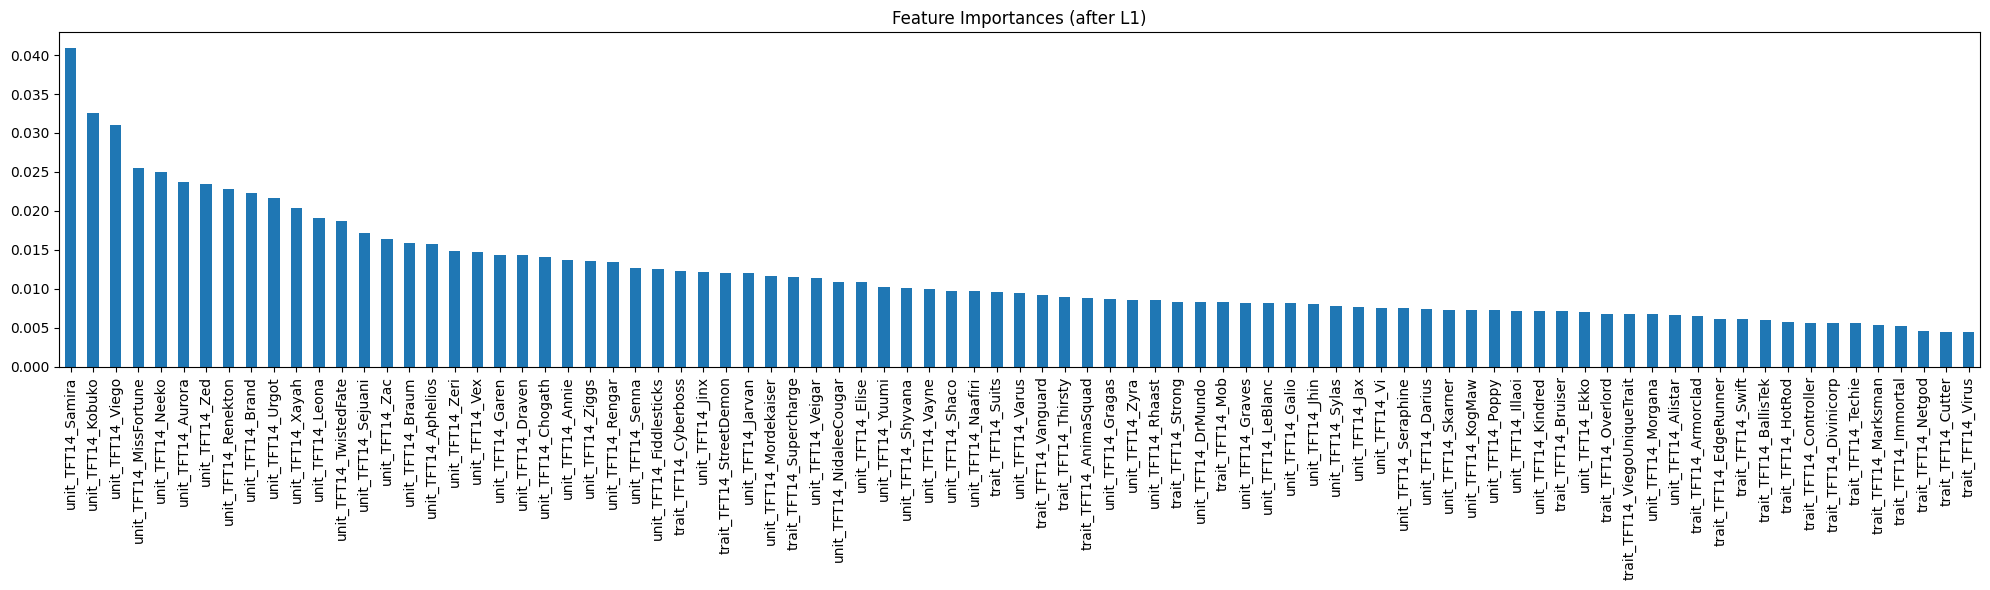

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = best_model.feature_importances_

# Create a dataframe to sort and view
feat_imp = pd.Series(importances, index=df.drop(columns='placement').columns)
feat_imp = feat_imp.sort_values(ascending=False)

# Plot with wider figure
plt.figure(figsize=(20, 6))  # wider figure
feat_imp.plot(kind='bar', title='Feature Importances (after L1)')
plt.tight_layout()
plt.show()